# Exploratory Data Analysis - Stack Overflow Developer Survey 

![](https://survey.stackoverflow.co/2025/img/stackoverflow-dev-survey-og.png)



## Introduction

In this notebook, we'll analyze the StackOverflow Developer Survey 2025 dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the official analysis of the data here: https://insights.stackoverflow.com/survey.



You can go through the downloaded files using the "File" > "Open" menu option in Jupyter. It seems like the dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [ ]:
import pandas as pd
import numpy as np

In [100]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [149]:
survey_raw_df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,Na

The dataset contains over 49,000 responses to 169 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [102]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment',
       'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode',
       'LearnCodeAI',
       ...
       'AIAgentOrchestration', 'AIAgentOrchWrite', 'AIAgentObserveSecure',
       'AIAgentObsWrite', 'AIAgentExternal', 'AIAgentExtWrite', 'AIHuman',
       'AIOpen', 'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=170)

It appears that qname for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains  six columns. We can load it as Pandas Series with `Column` as the index and the  `question` as the value.

In [103]:
schema_fname =  'survey_results_schema.csv'
schema_df = pd.read_csv(schema_fname,index_col='qname')
schema_df

,qid,question,type,sub,sq_id
qname,,,,,
TechEndorse_1,QID18,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0
TechEndorse_2,QID18,What attracts you to a technology or causes yo...,RO,Easy-to-use API,2.0
TechEndorse_3,QID18,What attracts you to a technology or causes yo...,RO,Robust and complete API,3.0
TechEndorse_4,QID18,What attracts you to a technology or causes yo...,RO,Customizable and manageable codebase,4.0
TechEndorse_5,QID18,What attracts you to a technology or causes yo...,RO,Reputation for quality,5.0
...,...,...,...,...,...
AIAgentObsWrite,QID103,Was the tool or tools for AI agent observabili...,TE,NaN,NaN
AIAgentExternal,QID92,You indicated you use or develop AI agents as ...,MC,NaN,NaN
AIAgentExtWrite,QID104,"Was the out-of-the-box agents, copilots or ass...",TE,NaN,NaN


Since `schema_df` contains just one column, let's retrieve the column as a Pandas series.

In [104]:
schema_raw=schema_df.question

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preprocessing & Cleaning with Pandas

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [105]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    
    'EdLevel',
   
    # Programming experience

    'YearsCode',



    # AI
    'AIThreat',
    'AISelect',
    'AIFrustration',
    'AILearnHow',
    'AIOpen',
    'LearnCodeAI',

    # Job
    'JobSat',
    'WorkExp',
    'CompTotal',
    
]

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [106]:
survey_df = survey_raw_df[selected_columns].copy()

Let's view some basic information about the data frame.

In [107]:
schema = schema_raw[selected_columns]

In [108]:
survey_df.shape

(49123, 13)

In [109]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        35402 non-null  object 
 1   Age            49123 non-null  object 
 2   EdLevel        48087 non-null  object 
 3   YearsCode      43000 non-null  float64
 4   AIThreat       36041 non-null  object 
 5   AISelect       33686 non-null  object 
 6   AIFrustration  31491 non-null  object 
 7   AILearnHow     28224 non-null  object 
 8   AIOpen         22520 non-null  object 
 9   LearnCodeAI    45153 non-null  object 
 10  JobSat         26643 non-null  float64
 11  WorkExp        42844 non-null  float64
 12  CompTotal      24839 non-null  float64
dtypes: float64(4), object(9)
memory usage: 4.9+ MB


Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (49123). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 



In [150]:

survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['CompTotal'] = pd.to_numeric(survey_df.CompTotal, errors='coerce')
survey_df['WorkExp'] = pd.to_numeric(survey_df.WorkExp, errors='coerce')
survey_df['JobSat'] = pd.to_numeric(survey_df.JobSat, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [151]:
survey_df.describe()

,YearsCode,JobSat,WorkExp,CompTotal
count,43000.000000,26643.000000,42844.000000,2.483900e+04
mean,16.575256,7.202042,13.370810,2.236626e+70
std,11.789269,1.997234,10.801917,3.525011e+72
min,1.000000,0.000000,1.000000,0.000000e+00
25%,8.000000,6.000000,5.000000,5.500000e+04
50%,14.000000,8.000000,10.000000,1.050000e+05
75%,24.000000,8.000000,20.000000,2.400000e+05
max,100.000000,10.000000,100.000000,5.555556e+74


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [114]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [115]:
survey_df.Country.nunique()

177

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [116]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States of America                                7226
Germany                                                 3022
India                                                   2542
United Kingdom of Great Britain and Northern Ireland    2038
France                                                  1409
Canada                                                  1303
Ukraine                                                  964
Poland                                                   887
Netherlands                                              867
Italy                                                    834
Brazil                                                   824
Australia                                                803
Spain                                                    717
Sweden                                                   616
Switzerland                                              546
Name: count, dtype: int64

We can visualize this information using a bar chart.

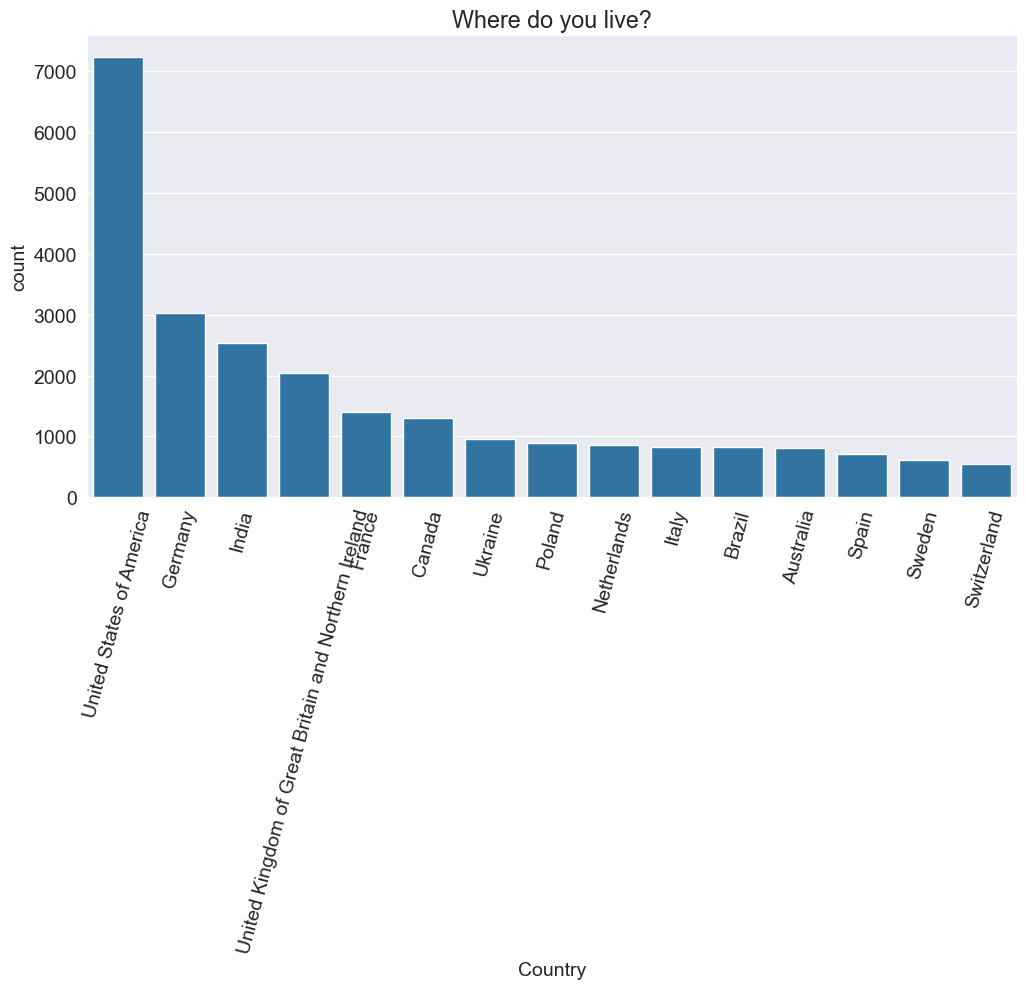

In [117]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries)
plt.show()

It appears that a disproportionately high number of respondents are from the US, probably because the survey is in English and stackflow is popular website for developer in US. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.



Let's create a Choropleth map to better visualize the relative responses from various countries.

In [118]:
# countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json') as response:
    countries_geojson = json.load(response)

In [119]:
country_counts = survey_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States of America,7226
1,Germany,3022
2,India,2542
3,United Kingdom of Great Britain and Northern I...,2038
4,France,1409
...,...,...
172,Gabon,1
173,Mauritania,1
174,Timor-Leste,1
175,Guinea-Bissau,1


In [120]:
import plotly.express as px


# Create the choropleth map
fig = px.choropleth(
    country_counts_df,
    geojson=countries_geojson,
    locations='Country',
    color='Count',
    color_continuous_scale="Blues",
    featureidkey="properties.name",
    title='World Developer Choropleth Map'
)

# Customize the map layout
fig.update_geos(
    fitbounds="locations",
    visible=False
)
fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Show the plot
fig.show()


### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram and box plot to visualize its distribution. 

In [121]:
Age_group=survey_df.Age.value_counts()
Age_group

Age
25-34 years old      16485
35-44 years old      13232
18-24 years old       9195
45-54 years old       6265
55-64 years old       2626
65 years or older      942
Prefer not to say      378
Name: count, dtype: int64

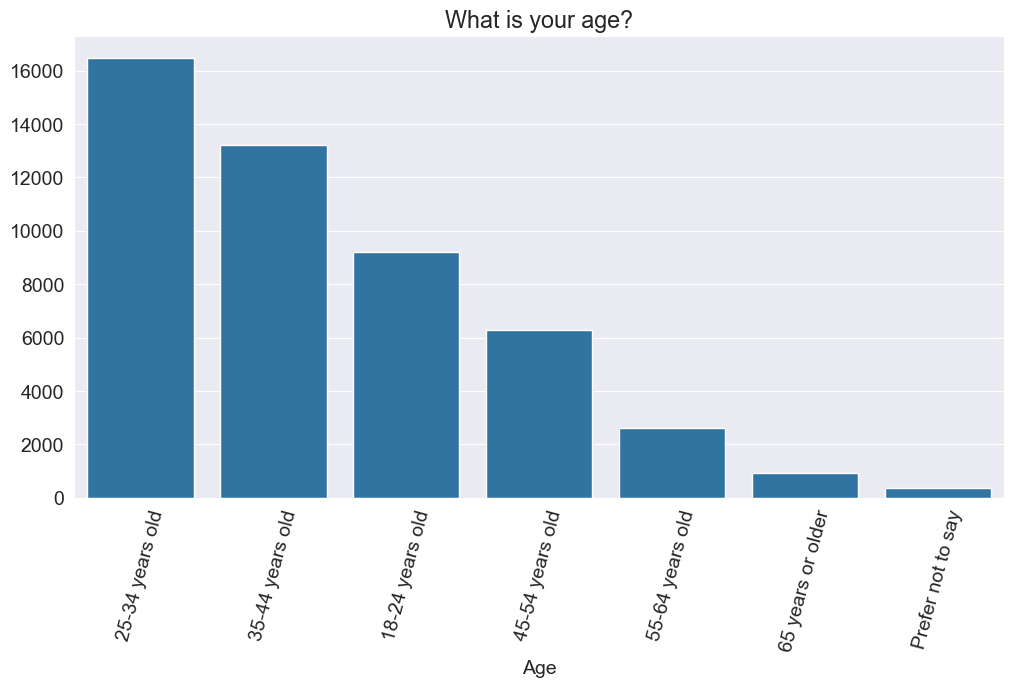

In [122]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Age)
sns.barplot(x=Age_group.index, y=Age_group.values)
plt.show()

It appears that a large percentage of respondents are 20-40 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.



### YearsCode

Let's look at the distribution of responses for the YearsCode. 

In [123]:
schema.YearsCode

'Including any education, how many years have you been coding in total?  Please round to the nearest whole number, excluding any decimal points.'

In [124]:
YearsCode_counts = survey_df.YearsCode.value_counts()
YearsCode_counts

YearsCode
10.0    3104
15.0    2539
20.0    2496
5.0     2264
8.0     2108
        ... 
89.0       1
78.0       1
76.0       1
82.0       1
75.0       1
Name: count, Length: 78, dtype: int64

C:\Users\ywang\AppData\Local\Temp\ipykernel_11936\2877634621.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




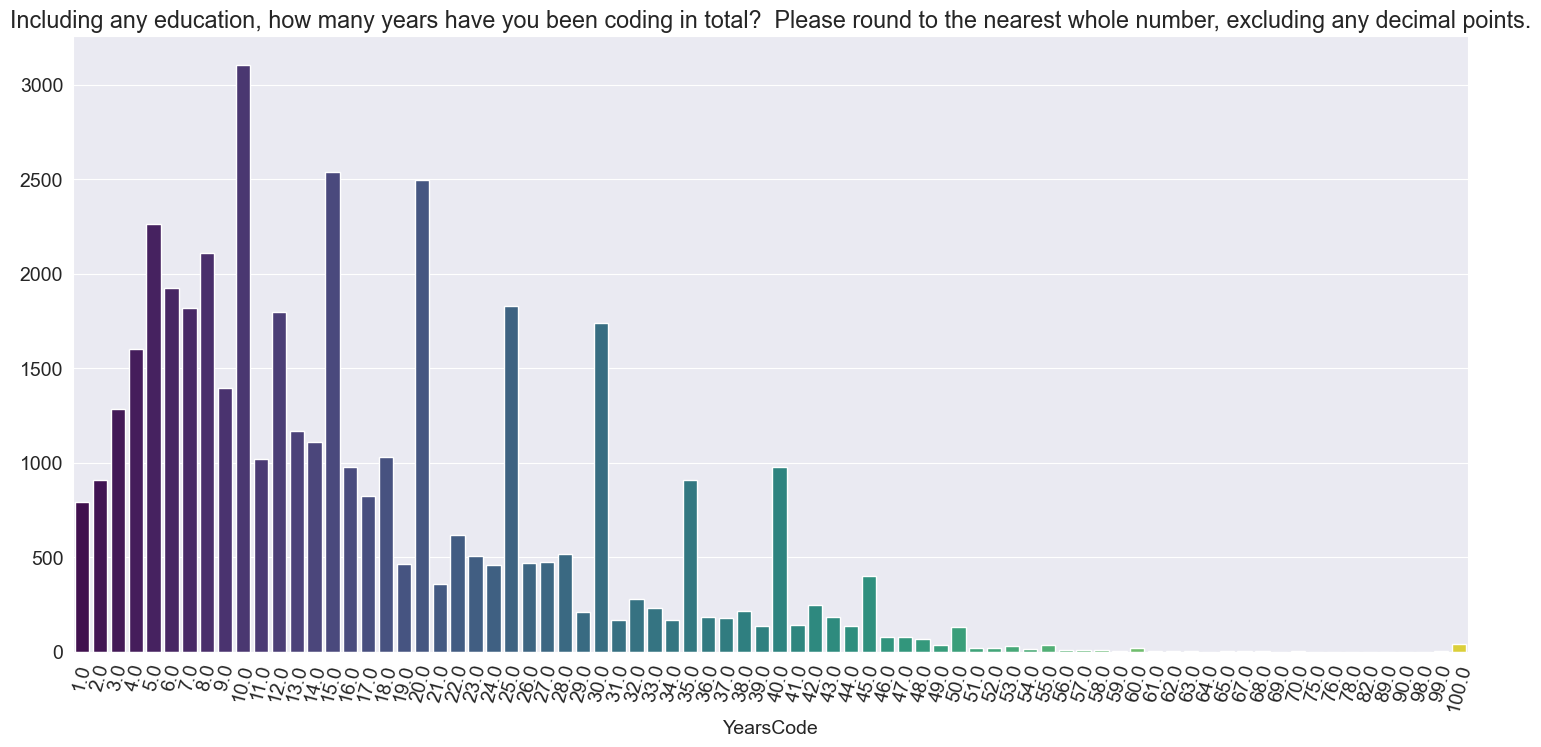

In [125]:


plt.figure(figsize=(18,8))
plt.xticks(rotation=75)
plt.title(schema.YearsCode)
sns.barplot(x=YearsCode_counts.index, y=YearsCode_counts.values,palette='viridis')
plt.show()

Most people is under 10 years, there are quite a lot between 10-20 years.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

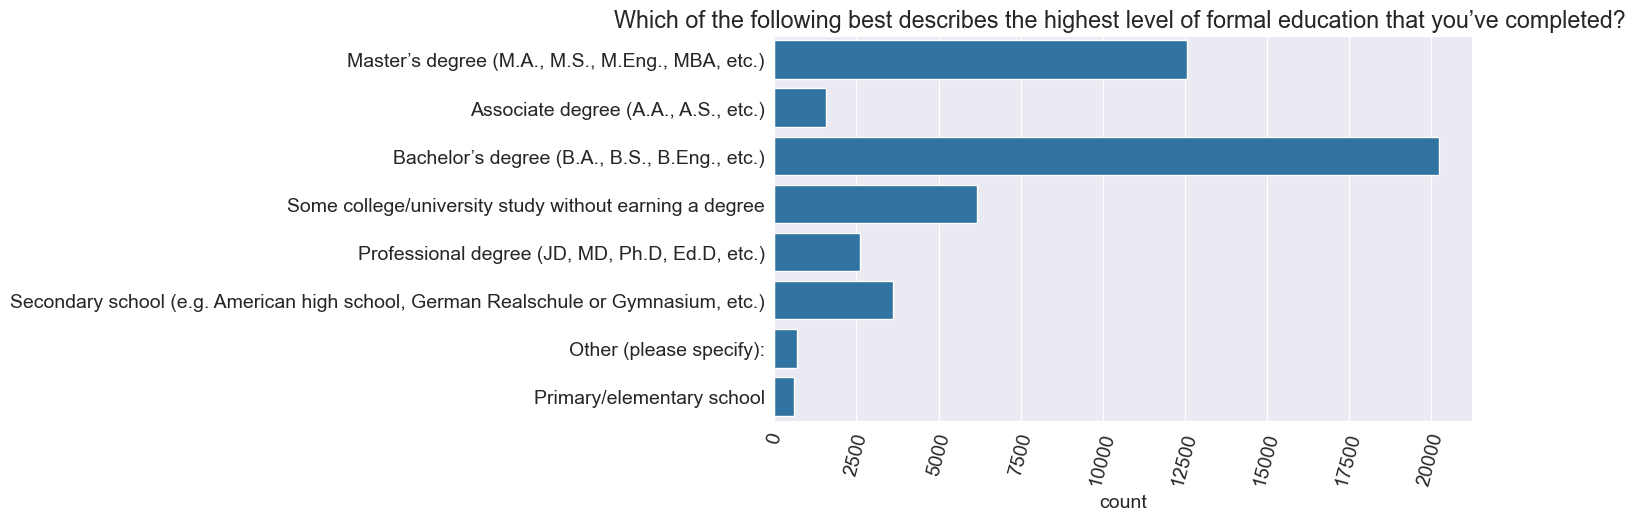

In [126]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None)
plt.show()

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.



In [ ]:
survey_df.CompTotal.describe(percentiles=[0.10,0.20,0.90])

count    2.483900e+04
mean     2.236626e+70
std      3.525011e+72
min      0.000000e+00
10%      2.000000e+04
20%      4.500000e+04
50%      1.050000e+05
90%      1.200000e+06
max      5.555556e+74
Name: CompTotal, dtype: float64

In [ ]:
px.histogram(survey_df[(survey_df['CompTotal'] < 100000)], x="CompTotal", marginal="box", title='Compensation of Respondents under $1MM')

It is obviouly that compenstion is widely spreaded, however I highly doubt respondents may gave some missleading information as many of them put something near $0.

### AI

Let's see how AI has impact developer's work

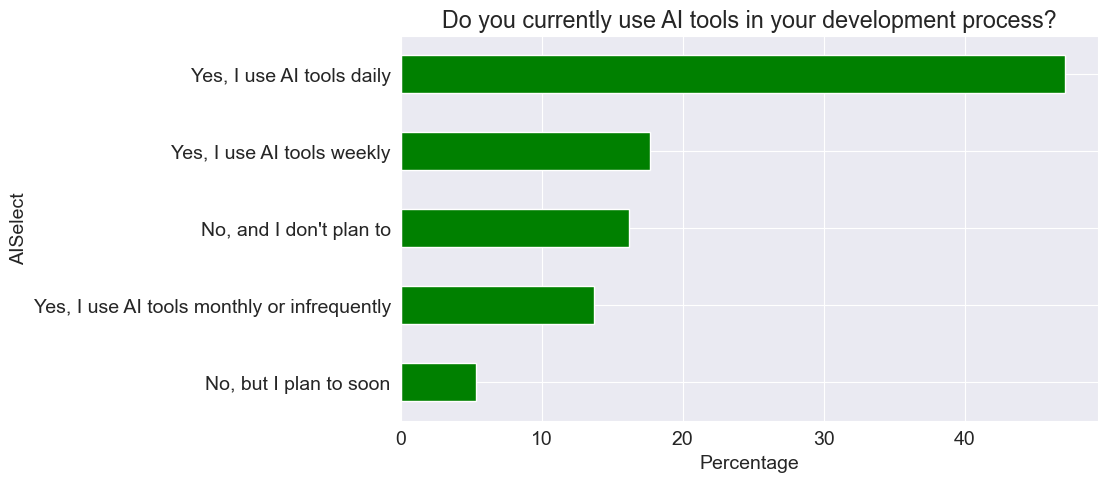

In [127]:
(survey_df.AISelect.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.AISelect)
plt.xlabel('Percentage')
plt.show()

It appears over 50% people use AI tools daily! Only 20% people do not and not plan to use AI soon.



The `LearnCodeAI` field contains information about how people learn AI programming

In [128]:
schema.LearnCodeAI

'Did you spend time in the last year learning AI programming or AI-enabled tooling on your own or at work?'

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

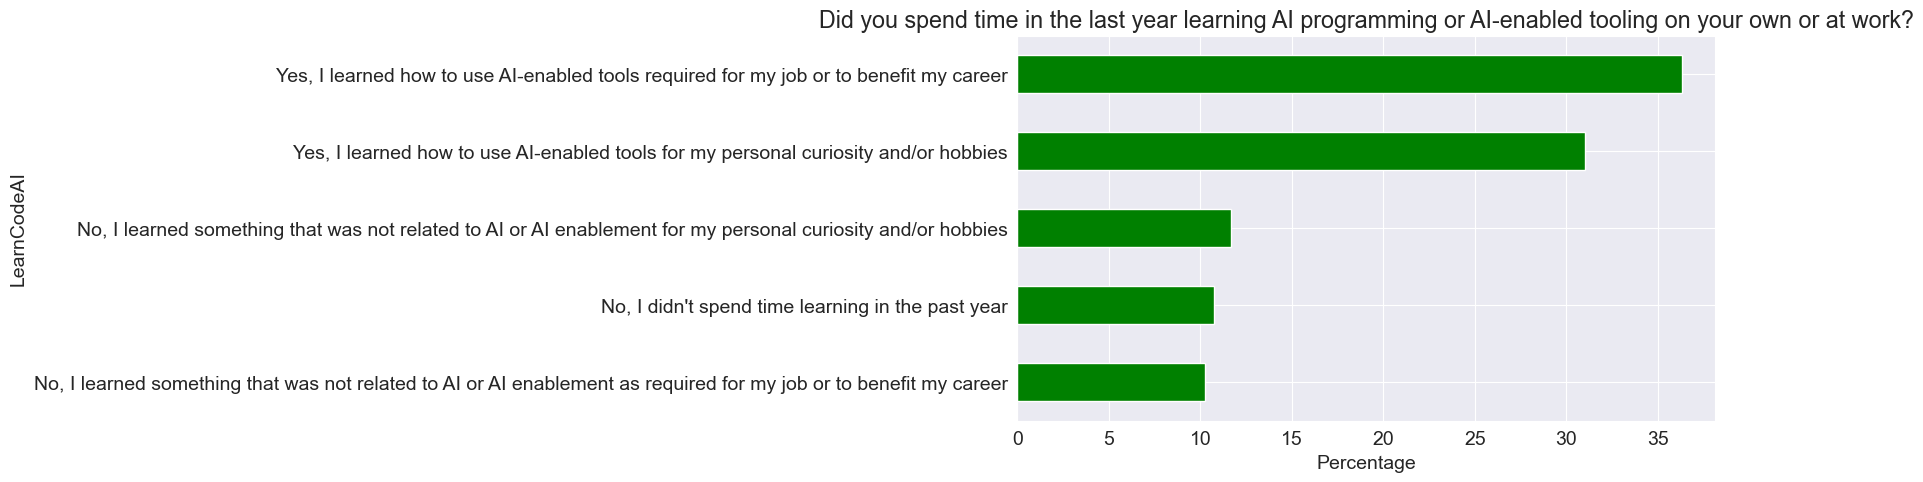

In [129]:
(survey_df.LearnCodeAI.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.LearnCodeAI)
plt.xlabel('Percentage')
plt.show()

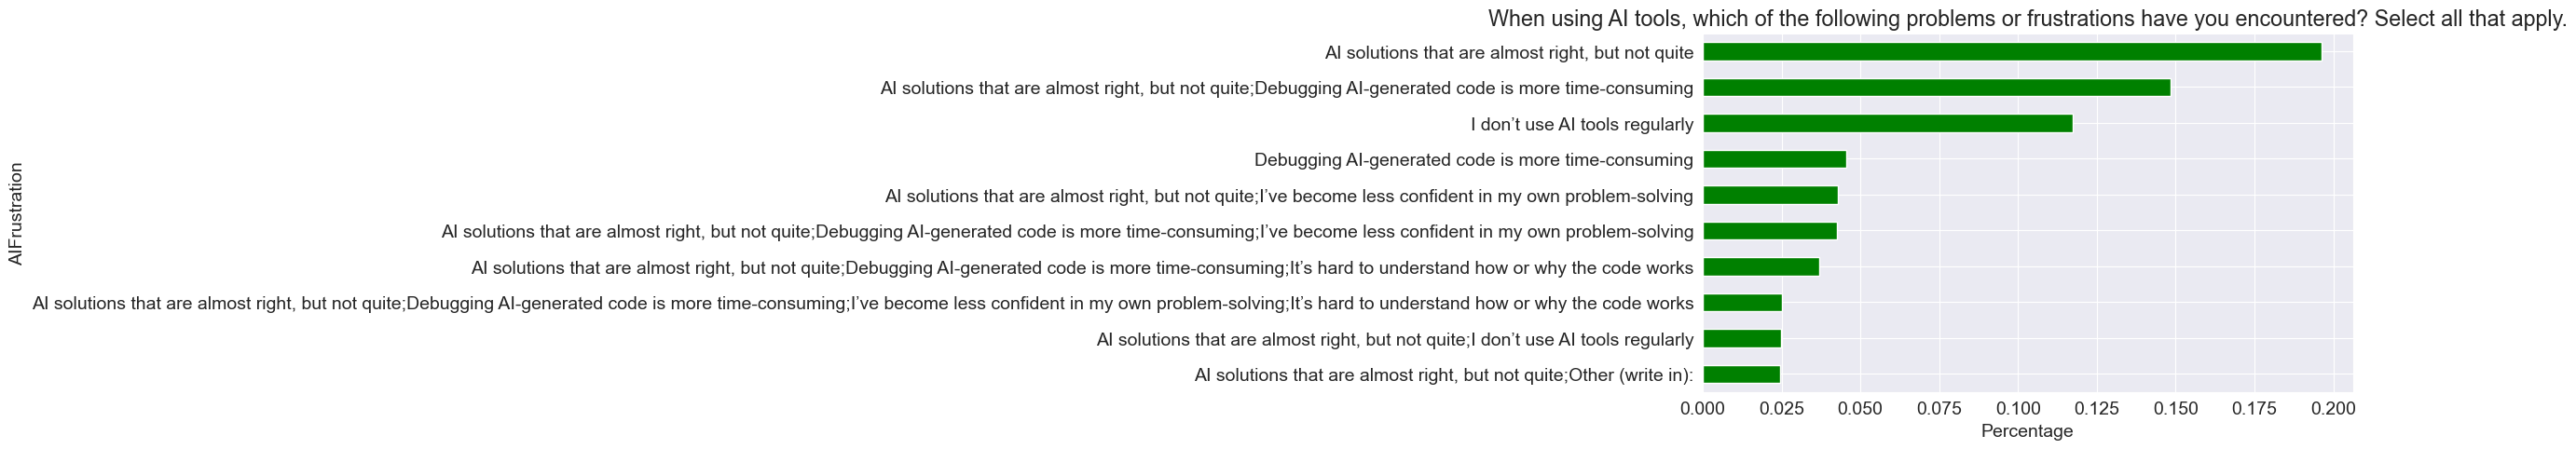

In [130]:
(survey_df.AIFrustration.value_counts(normalize=True, ascending=True)).tail(10).plot(kind='barh', color='g')
plt.title(schema.AIFrustration)
plt.xlabel('Percentage')
plt.show()

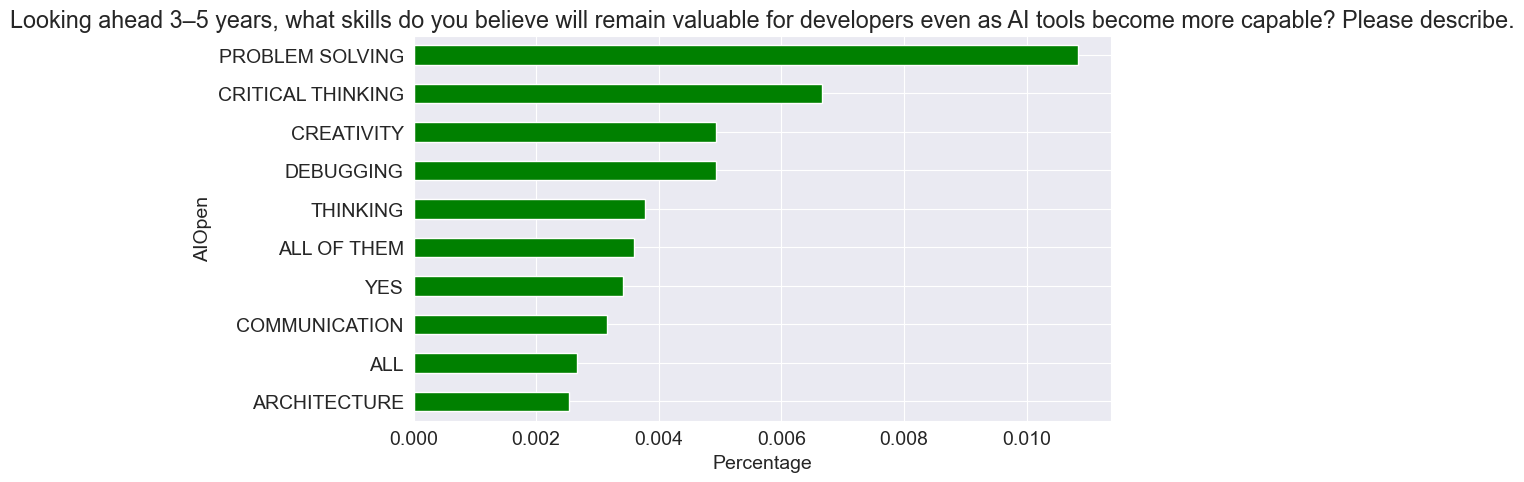

In [131]:
(survey_df.AIOpen.str.upper().value_counts(normalize=True, ascending=True)).tail(10).plot(kind='barh', color='g')
plt.title(schema.AIOpen)
plt.xlabel('Percentage')
plt.show()

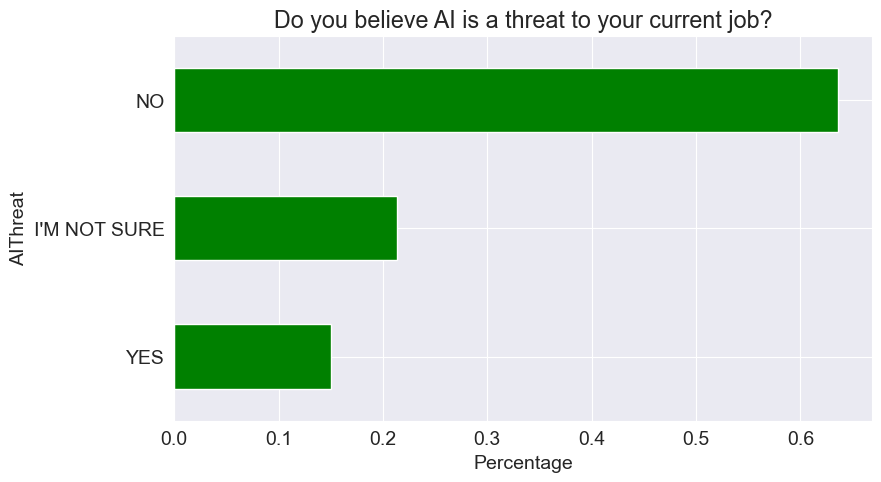

In [132]:
(survey_df.AIThreat.str.upper().value_counts(normalize=True, ascending=True)).plot(kind='barh', color='g')
plt.title(schema.AIThreat)
plt.xlabel('Percentage')
plt.show()

In [136]:
import pandas as pd
pd.set_option('display.max_columns', None)


In [137]:
survey_raw_df.head()


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,Na

In [138]:
survey_raw_df.AIAcc.value_counts(normalize=True)

AIAcc
Somewhat trust                0.296386
Somewhat distrust             0.260823
Neither trust nor distrust    0.215097
Highly distrust               0.196248
Highly trust                  0.031445
Name: proportion, dtype: float64

In [139]:
survey_df.columns

Index(['Country', 'Age', 'EdLevel', 'YearsCode', 'AIThreat', 'AISelect',
       'AIFrustration', 'AILearnHow', 'AIOpen', 'LearnCodeAI', 'JobSat',
       'WorkExp', 'CompTotal'],
      dtype='object')

### Model

In [140]:
target='AIAcc'
features=[ 'Age',  'YearsCode', 
        'JobSat',
       'WorkExp', 'CompTotal']

In [141]:
# Clean and filter data
mddel_df = survey_raw_df.dropna(subset=[target] + features)
mddel_df = mddel_df[mddel_df[target].isin(['Highly trust', 'Somewhat trust', 'Somewhat distrust', 'Highly distrust'])]
# Create binary target variable (High Trust vs. Low Trust)
mddel_df['Trust_Class'] = mddel_df[target].apply(
    lambda x: 1 if x in ['Highly trust', 'Somewhat trust'] else 0
)

In [142]:
mddel_df[target].value_counts(normalize=True)


AIAcc
Somewhat trust       0.377032
Somewhat distrust    0.342109
Highly distrust      0.249899
Highly trust         0.030960
Name: proportion, dtype: float64

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import (
    roc_auc_score, average_precision_score, confusion_matrix
)

In [144]:
# Split the data
X = mddel_df[features]
y = mddel_df['Trust_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# -----------------------------
# 4) Preprocessing
# -----------------------------
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in cat_cols]

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

pre = ColumnTransformer([
    ("cat", cat_pipe, cat_cols),
    ("num", num_pipe, num_cols),
])



In [145]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def evaluate_model(name, model, X_test, y_test):
    """Return dict of metrics and confusion matrix for a fitted pipeline."""
    proba = model.predict_proba(X_test)[:, 1]
    roc = roc_auc_score(y_test, proba)
    pr  = average_precision_score(y_test, proba)
    y_pred = (proba >= 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred,normalize='true')
    cm_chart=plot_confusion_matrix(cm, classes=['Low Trust', 'High Trust'], title=f'Confusion Matrix for {name}')


    return {
        "name": name,
        "roc_auc": roc,
        "pr_auc": pr,
        "conf_matrix": cm,
        "confusion_matrix chart":cm_chart
    }



In [146]:

# -----------------------------a
# 5) Models
# -----------------------------
logreg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
gbdt   = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.05,
    n_estimators=300,
    max_depth=3,
    subsample=0.9
)

pipe_lr  = Pipeline([("pre", pre), ("clf", logreg)])
pipe_gbdt = Pipeline([("pre", pre), ("clf", gbdt)])

# -----------------------------
# 6) Train
# -----------------------------
pipe_lr.fit(X_train, y_train)
pipe_gbdt.fit(X_train, y_train)



Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Age']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearsCode', 'JobSat',
                                                   'WorkExp', 'CompTotal'])])),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=300, random_state=42,
                                            subsample=0.9))])

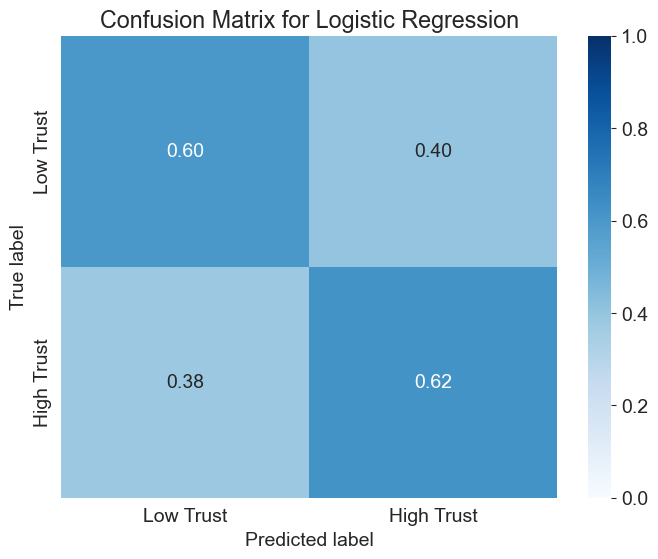

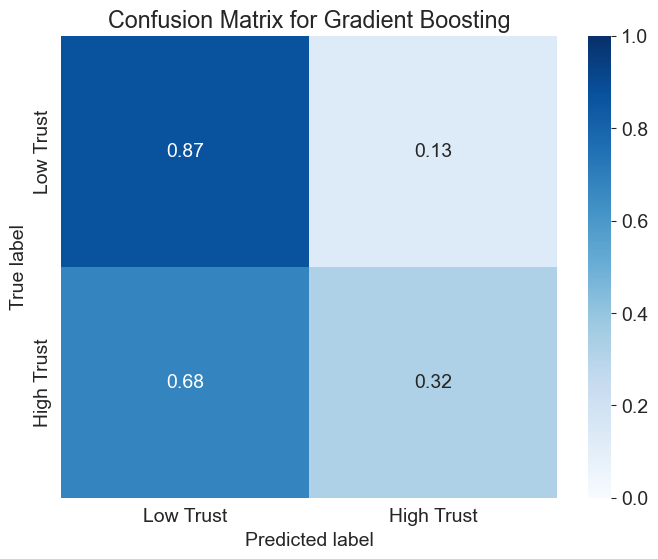


=== MODEL COMPARISON (Test Set) ===
Logistic Regression:
  ROC AUC:        0.6435
  PR  AUC:        0.5410
  Confusion Matrix @0.5 [TN FP; FN TP]:
[[0.5984252  0.4015748 ]
 [0.38083333 0.61916667]]
--------------------------------------------------
Gradient Boosting:
  ROC AUC:        0.6561
  PR  AUC:        0.5567
  Confusion Matrix @0.5 [TN FP; FN TP]:
[[0.87064117 0.12935883]
 [0.6775     0.3225    ]]
--------------------------------------------------


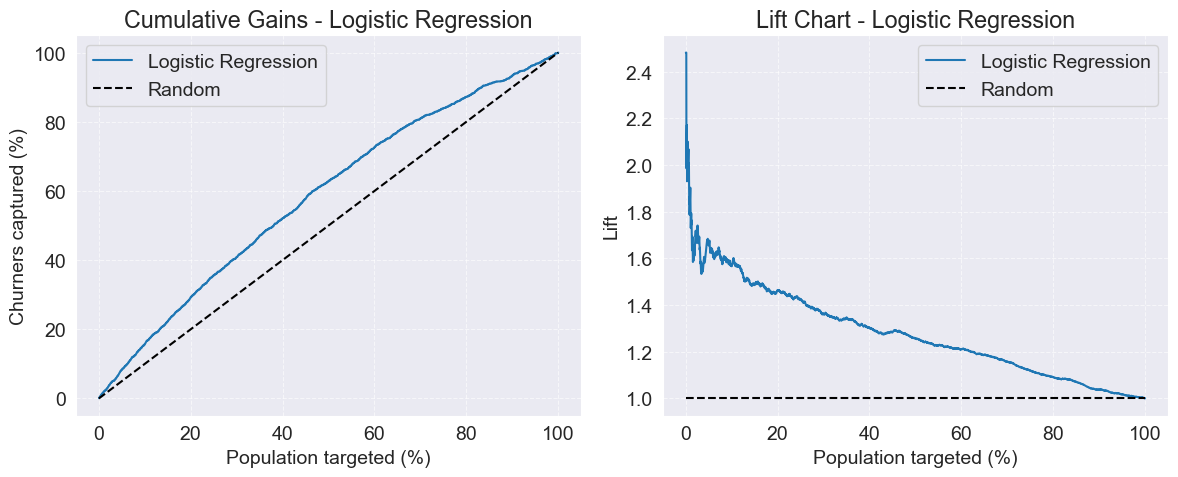

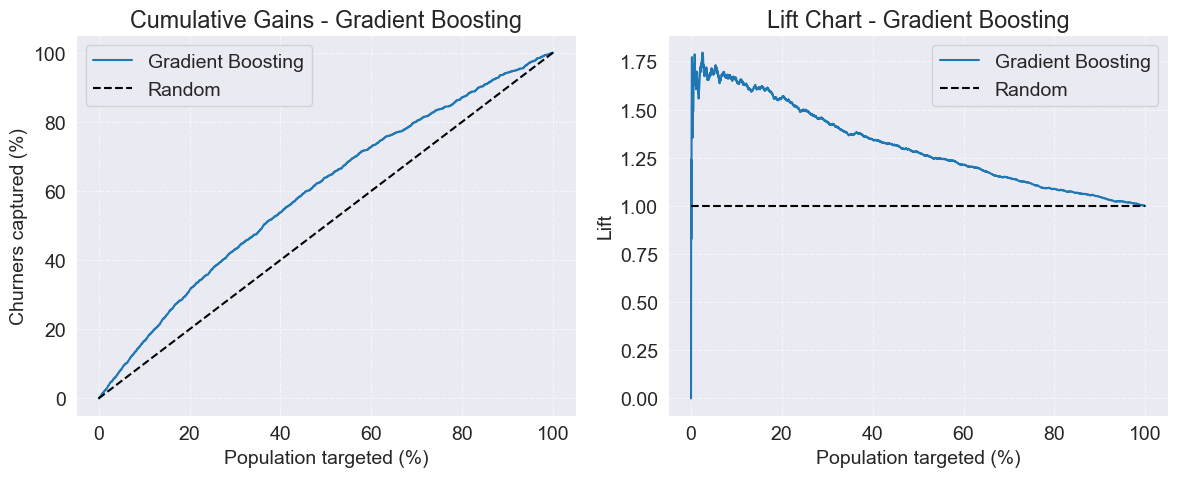


=== Top Features - Logistic Regression ===
                  feature  coefficient
6     Age_35-44 years old    -0.924215
7     Age_45-54 years old    -0.904470
5     Age_25-34 years old     0.666531
4     Age_18-24 years old     0.585975
9   Age_65 years or older     0.478948
0               YearsCode    -0.461409
3               CompTotal     0.372861
1                  JobSat    -0.263427
8     Age_55-64 years old     0.131250
10  Age_Prefer not to say    -0.053086
2                 WorkExp     0.005946


C:\Users\ywang\AppData\Local\Temp\ipykernel_11936\1001231497.py:99: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




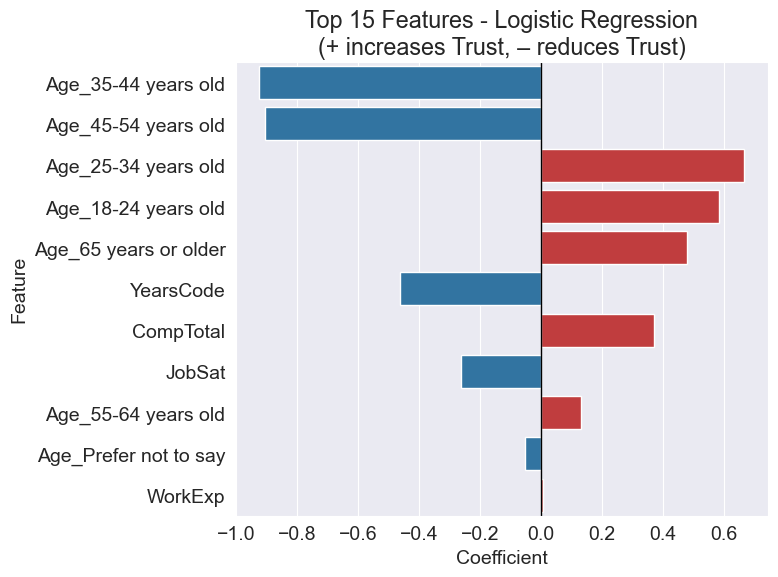


=== Top Features - Gradient Boosting ===
                  feature  importance
7     Age_45-54 years old    0.437322
9   Age_65 years or older    0.270643
8     Age_55-64 years old    0.092638
10  Age_Prefer not to say    0.055335
0               YearsCode    0.038434
1                  JobSat    0.030860
4     Age_18-24 years old    0.026357
3               CompTotal    0.023850
2                 WorkExp    0.018821
6     Age_35-44 years old    0.004880
5     Age_25-34 years old    0.000859


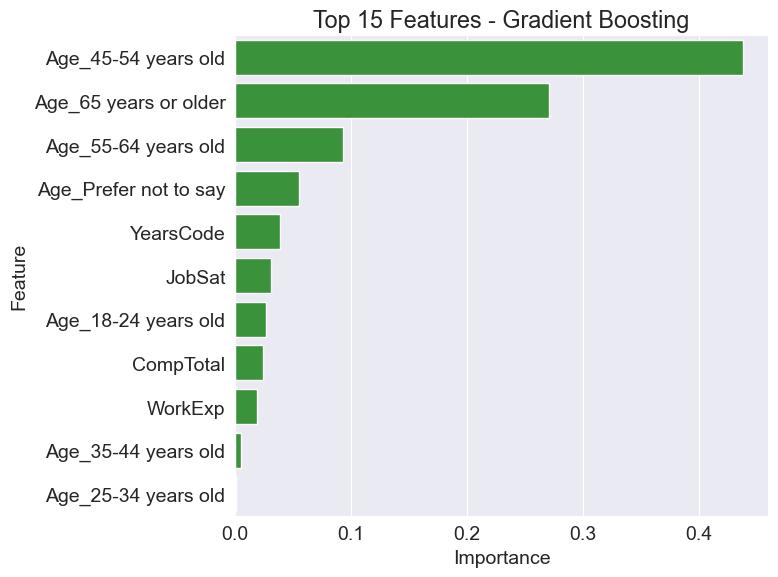

In [147]:
# -----------------------------
# 7) Evaluate
# -----------------------------
results = []
results.append(evaluate_model("Logistic Regression", pipe_lr, X_test, y_test))
results.append(evaluate_model("Gradient Boosting", pipe_gbdt, X_test, y_test))

print("\n=== MODEL COMPARISON (Test Set) ===")
for r in results:
    print(f"{r['name']}:")
    print(f"  ROC AUC:        {r['roc_auc']:.4f}")
    print(f"  PR  AUC:        {r['pr_auc']:.4f}")
    print(f"  Confusion Matrix @0.5 [TN FP; FN TP]:\n{r['conf_matrix']}")
    print("-" * 50)



def plot_gains_and_lift(y_true, y_score, model_name):
    """
    Plots cumulative gains and lift chart for a given model.
    """
    # Sort by score descending
    order = np.argsort(-y_score)
    y_true_sorted = np.array(y_true)[order]
    
    # Cumulative churners captured
    cum_churn = np.cumsum(y_true_sorted)
    total_churn = y_true.sum()
    cum_perc_churn = cum_churn / total_churn
    
    # Population percentages
    n = len(y_true)
    perc_pop = np.arange(1, n + 1) / n
    
    # Lift = (percentage of churners captured) / (percentage of population targeted)
    lift = cum_perc_churn / perc_pop

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # --- Gains Chart ---
    axes[0].plot(perc_pop * 100, cum_perc_churn * 100, label=model_name)
    axes[0].plot([0, 100], [0, 100], 'k--', label='Random')
    axes[0].set_title(f'Cumulative Gains - {model_name}')
    axes[0].set_xlabel('Population targeted (%)')
    axes[0].set_ylabel('Churners captured (%)')
    axes[0].legend()
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # --- Lift Chart ---
    axes[1].plot(perc_pop * 100, lift, label=model_name)
    axes[1].plot([0, 100], [1, 1], 'k--', label='Random')
    axes[1].set_title(f'Lift Chart - {model_name}')
    axes[1].set_xlabel('Population targeted (%)')
    axes[1].set_ylabel('Lift')
    axes[1].legend()
    axes[1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()



def get_feature_names(pipeline, X_train):
    preprocessor = pipeline.named_steps['pre']

    # Get feature names for numeric columns
    num_features = []
    cat_features = []
    cat_encoded = []

    for name, transformer, cols in preprocessor.transformers_:
        if name == "num":
            num_features = cols
        elif name == "cat":
            # If the transformer is a pipeline, get the OneHotEncoder
            if hasattr(transformer, 'named_steps') and 'ohe' in transformer.named_steps:
                cat_features = cols
                cat_encoder = transformer.named_steps['ohe']
                cat_encoded = cat_encoder.get_feature_names_out(cat_features)
    
    return np.concatenate([num_features, cat_encoded])


# --- Logistic Regression Feature Importance ---
def plot_lr_coefficients(pipe, X_train, top_n=15):
    feature_names = get_feature_names(pipe, X_train)
    coefs = pipe.named_steps['clf'].coef_[0]  # <-- fix here

    importance_df = pd.DataFrame({
        "feature": feature_names,
        "coefficient": coefs,
        "abs_importance": np.abs(coefs)
    }).sort_values(by="abs_importance", ascending=False).head(top_n)

    print("\n=== Top Features - Logistic Regression ===")
    print(importance_df[['feature', 'coefficient']])

    plt.figure(figsize=(8, 6))
    sns.barplot(
        x="coefficient", 
        y="feature", 
        data=importance_df,
        palette=["#d62728" if x > 0 else "#1f77b4" for x in importance_df["coefficient"]]
    )
    plt.axvline(0, color="black", linewidth=1)
    plt.title(f"Top {top_n} Features - Logistic Regression\n(+ increases Trust, – reduces Trust)")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    return importance_df


# --- Gradient Boosting Feature Importance ---
def plot_gbdt_importance(pipe, X_train, top_n=15):
    feature_names = get_feature_names(pipe, X_train)
    importances = pipe.named_steps['clf'].feature_importances_  # <-- fix here

    importance_df = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    }).sort_values(by="importance", ascending=False).head(top_n)

    print("\n=== Top Features - Gradient Boosting ===")
    print(importance_df)

    plt.figure(figsize=(8, 6))
    sns.barplot(
        x="importance", 
        y="feature", 
        data=importance_df,
        color="#2ca02c"
    )
    plt.title(f"Top {top_n} Features - Gradient Boosting")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    return importance_df

proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
proba_gbdt = pipe_gbdt.predict_proba(X_test)[:, 1]

plot_gains_and_lift(y_test, proba_lr, "Logistic Regression")
plot_gains_and_lift(y_test, proba_gbdt, "Gradient Boosting")




# --- Run for both models ---
lr_importance_df = plot_lr_coefficients(pipe_lr, X_train)
gbdt_importance_df = plot_gbdt_importance(pipe_gbdt, X_train)

In [148]:
# 8) Pick the best model
# -----------------------------
# Here we pick by ROC AUC; change key to "pr_auc" if you prefer
best_model = max(results, key=lambda x: x["roc_auc"])
print(f"\nBest model by ROC AUC → {best_model['name']}")


Best model by ROC AUC → Gradient Boosting
